In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import copy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from IPython.display import display, HTML

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

%matplotlib inline
plt.style.use('ggplot')

In [31]:
Dataset = pd.read_csv("C://Users//Shital//Personal//Educational//Study and resume//Data Science//Courese Data//ML Specialization Coursera//Dataset//archive//insurance.csv")
Dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
Dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [33]:
Dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [34]:
Dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [35]:
Dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [36]:
Dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [37]:
Dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [38]:
Dataset.groupby('sex')['charges'].describe().unstack()

       sex   
count  female      662.000000
       male        676.000000
mean   female    12569.578844
       male      13956.751178
std    female    11128.703801
       male      12971.025915
min    female     1607.510100
       male       1121.873900
25%    female     4885.158700
       male       4619.134000
50%    female     9412.962500
       male       9369.615750
75%    female    14454.691825
       male      18989.590250
max    female    63770.428010
       male      62592.873090
dtype: float64

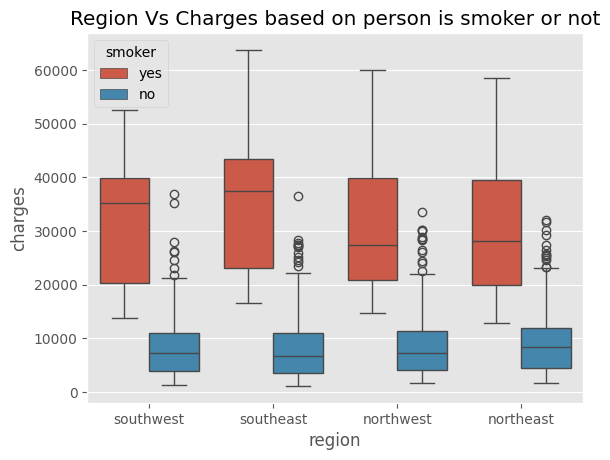

In [39]:
sns.boxplot(x= Dataset['region'], y= Dataset['charges'], data=Dataset,hue= 'smoker')
plt.title('Region Vs Charges based on person is smoker or not')
plt.show()

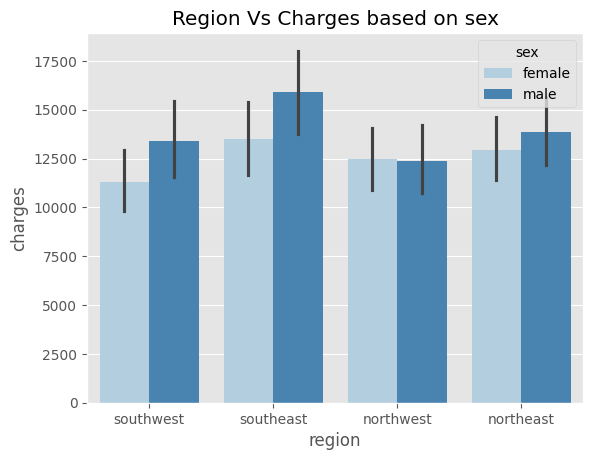

In [40]:
sns.barplot(x=Dataset.region,y=Dataset.charges,data=Dataset,hue='sex',palette='Blues')
plt.title('Region Vs Charges based on sex')
plt.show()

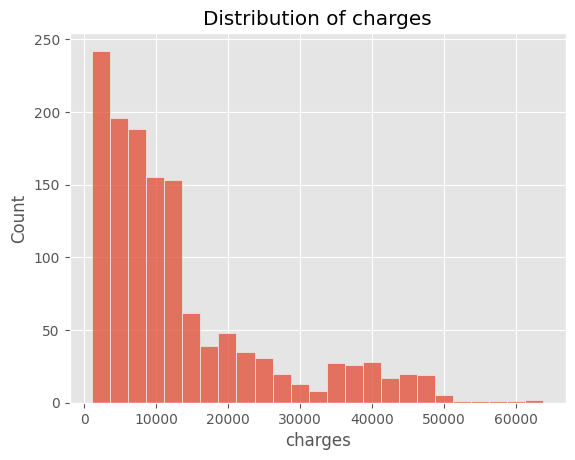

In [41]:
sns.histplot(x=Dataset.charges,bins=25)
plt.title('Distribution of charges')
plt.show()

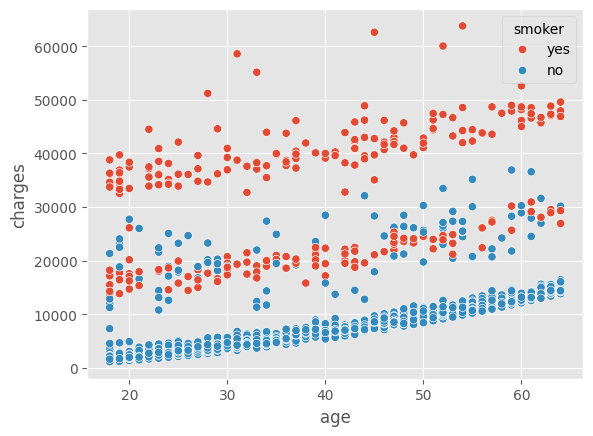

In [42]:
sns.scatterplot(x="age", y="charges", hue="smoker", data=Dataset)
plt.show()

In [43]:
Dataset['sex'] = Dataset['sex'].replace(['male','female'],[0,1])
Dataset['smoker'] = Dataset['smoker'].replace(['yes','no'],[1,0])
Dataset['region'] = Dataset['region'].replace(['southwest','southeast','northwest','northeast'],[0,1,2,3])

In [44]:
Dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


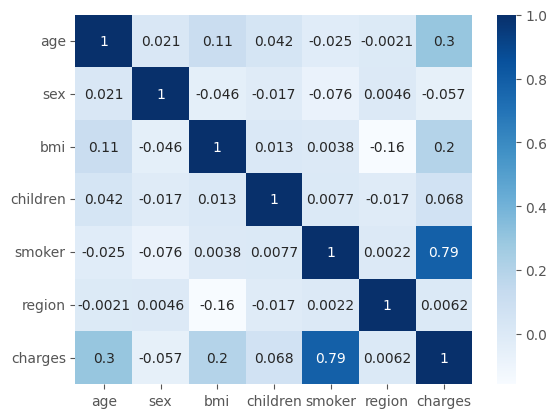

In [45]:
sns.heatmap(Dataset.corr(),annot=True,cmap='Blues')
plt.show()

### Polynomial regression model with python code

#### Feature Selection

Dropping Less Correlated features : As we above correlation matrix, smoker feature has highest correlation with charges but sex and region features has low correlation with all other features. So, Here we are dropping both features (sex, region).

In [46]:
y = Dataset['charges']
x = Dataset.drop('charges',axis=1)
x = Dataset.drop('region',axis=1)
x = Dataset.drop('sex',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#### Python code

In [47]:
def compute_cost(X, y, w, b):
    '''
    Computing the cost for linear regression model (mean squared error)
    '''
    m = X.shape[0] # number of training examples
    cost = 0
    
    f_wb = np.dot(w, X.T) + b
    cost = (1 / (2*m)) * np.sum(f_wb - y_train) ** 2
    
    return cost

In [48]:
def compute_gradient(X, y, w, b):
    '''
    Computing gradient descent derivatives
    '''
    m = X.shape[0] # number of training examples
    
    h = np.dot(w,X.T) + b
    dj_dw = np.dot((h - y), X) / m
    db_dw = np.sum(h - y) / m
    
    return dj_dw, db_dw

In [66]:
def create_polynomial_features(X, degree):
    """
    Create polynomial features for a given degree.
    """
    X_poly = np.ones((len(X), 1))  # Start with a column of ones (bias term)
    print(X_poly.shape)

    for i in range(1, degree + 1):
        X_poly = np.column_stack((X_poly, X**i))
    print('X_p: ',X_poly[0])

    return X_poly

In [50]:
def gradient_descent(X, y, w_in, b_in, cost_function, compute_gradient, alpha,num_iters):
    '''
    Computing gradient descent steps.
    '''
    
    m = m = X.shape[0]
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        dj_dw, db_dw = compute_gradient(X, y, w, b)
        
        w = w - alpha * dj_dw
        b = b - alpha * db_dw
        
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w, b)
            J_history.append(cost)

         # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b , J_history, w_history #return w and J,w history for graphing
    

In [67]:
initial_w = [0.0,0.0,0.0,0.0,0.0,0.0]
initial_b = 0.0
iterations = 1500
alpha = 0.000000000000000000005

degree = 2
X_poly = create_polynomial_features(x_train, degree)
theta_init = np.zeros(X_poly.shape[1])

w,b,J_history,_ = gradient_descent(X_poly, y_train, theta_init, initial_b, compute_cost, compute_gradient, alpha, iterations)

print(X_poly.shape)
print(theta_init.shape)
print("\nw,b found by gradient descent:", w, b)

(1070, 1)
X_p:  [1.00000000e+00 4.60000000e+01 1.99500000e+01 2.00000000e+00
 0.00000000e+00 2.00000000e+00 9.19383850e+03 2.11600000e+03
 3.98002500e+02 4.00000000e+00 0.00000000e+00 4.00000000e+00
 8.45266664e+07]
Iteration    0: Cost 95045154203.57   
Iteration  150: Cost 65878008438.94   
Iteration  300: Cost 47987681442.75   
Iteration  450: Cost 36736488583.98   
Iteration  600: Cost 29485612416.28   
Iteration  750: Cost 24705192724.06   
Iteration  900: Cost 21489006911.65   
Iteration 1050: Cost 19287392943.99   
Iteration 1200: Cost 17758569917.66   
Iteration 1350: Cost 16684672906.45   
(1070, 13)
(13,)

w,b found by gradient descent: [5.70184281e-14 2.43050216e-12 1.74439381e-12 6.74966290e-14
 1.75654375e-14 8.69118043e-14 9.78240201e-10 1.14388314e-10
 5.53574054e-11 1.66844472e-13 1.75654375e-14 2.03547433e-13
 2.44680339e-05] 5.701842807193154e-14


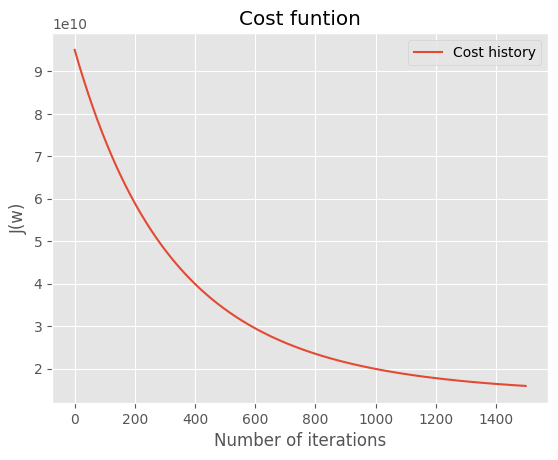

In [52]:
plt.title("Cost funtion")
plt.plot(J_history,label="Cost history");

plt.xlabel('Number of iterations')
plt.ylabel('J(w)')

plt.legend();
plt.show()

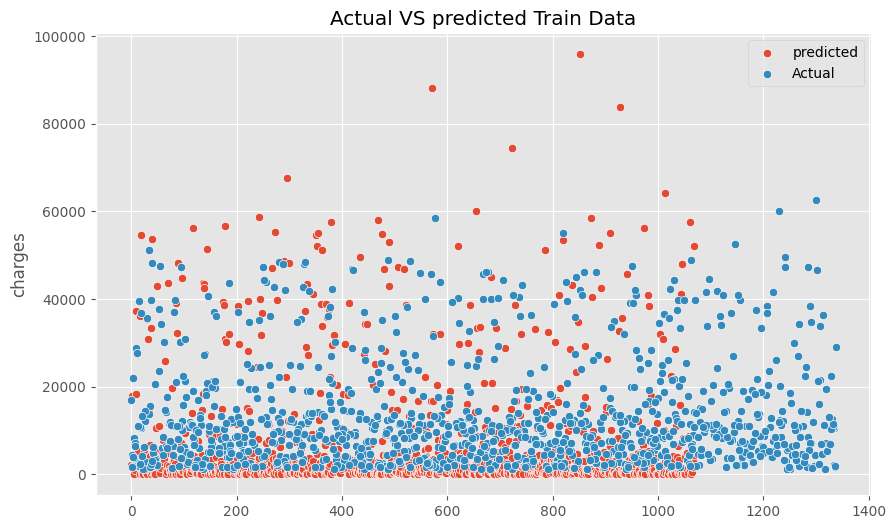

In [53]:
w_temp = w.tolist()
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
predicted = []
predicted_y = np.dot(w_temp,X_poly.T) + b

sns.scatterplot(predicted_y, label = 'predicted')
sns.scatterplot(y_train,label = 'Actual')
plt.title('Actual VS predicted Train Data')
plt.legend();
plt.show()

X_p:  [[1.00000000e+00 4.50000000e+01 2.51750000e+01 ... 0.00000000e+00
  3.00000000e+00 9.09506825e+03]
 [1.00000000e+00 3.60000000e+01 3.00200000e+01 ... 0.00000000e+00
  2.00000000e+00 5.27217580e+03]
 [1.00000000e+00 6.40000000e+01 2.68850000e+01 ... 1.00000000e+00
  2.00000000e+00 2.93309832e+04]
 ...
 [1.00000000e+00 3.80000000e+01 2.80250000e+01 ... 0.00000000e+00
  3.00000000e+00 6.06712675e+03]
 [1.00000000e+00 5.40000000e+01 4.74100000e+01 ... 1.00000000e+00
  1.00000000e+00 6.37704280e+04]
 [1.00000000e+00 5.10000000e+01 3.42000000e+01 ... 0.00000000e+00
  0.00000000e+00 9.87270100e+03]]
X_p:  [[1.00000000e+00 4.50000000e+01 2.51750000e+01 ... 0.00000000e+00
  9.00000000e+00 8.27202665e+07]
 [1.00000000e+00 3.60000000e+01 3.00200000e+01 ... 0.00000000e+00
  4.00000000e+00 2.77958377e+07]
 [1.00000000e+00 6.40000000e+01 2.68850000e+01 ... 1.00000000e+00
  4.00000000e+00 8.60306573e+08]
 ...
 [1.00000000e+00 3.80000000e+01 2.80250000e+01 ... 0.00000000e+00
  9.00000000e+00 3.6

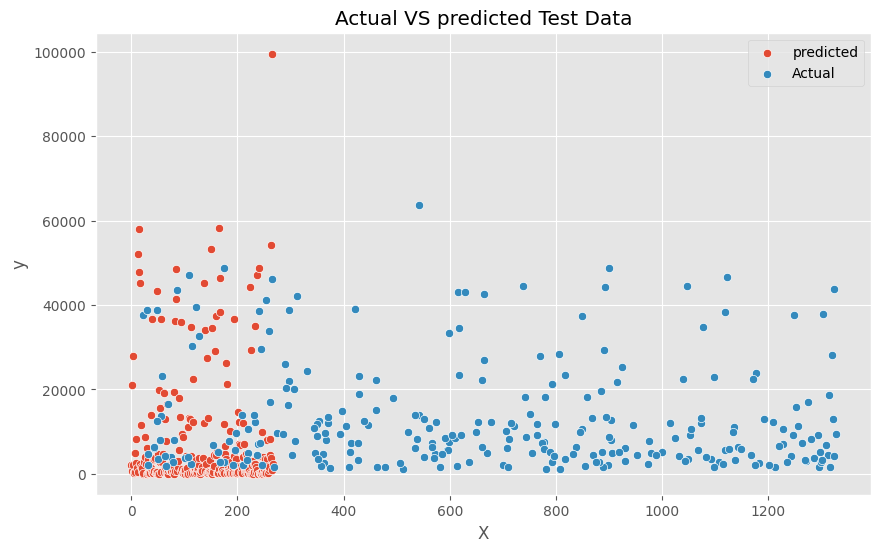

In [54]:
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
X_poly = create_polynomial_features(x_test, degree)
predicted = []
predicted_y = np.dot(w_temp,X_poly.T) + b

sns.scatterplot(predicted_y, label = 'predicted')
sns.scatterplot(y_test,label = 'Actual')
plt.title('Actual VS predicted Test Data')
plt.xlabel("X");
plt.ylabel("y");
plt.legend();
plt.show()

### Models comparisions Using Skit-learn
1. LinearRegression
2. SVM
3. GradientBoosting (n_estimators=100, max_depth=7)
4. Random Forest (n_estimators=100, max_depth=7)
5. XGBoost
6. KNeighbors
7. DecisionTree (max_depth=3)
8. Polynomial Regression

In [55]:
# Define models and algorithms
results= []
models = [
     ('LinearRegression',LinearRegression()),
     ('SVM',SVR()),
     ('GradientBoosting',GradientBoostingRegressor(n_estimators=100, max_depth=7)),
     ('Random Forest',RandomForestRegressor(n_estimators=100, max_depth=7)),
     ('XGBoost',XGBRegressor()),
     ('KNeighbors',KNeighborsRegressor()),
     ('DecisionTree',DecisionTreeRegressor(max_depth=3))
]
# Iterate over models and algorithms
for model_name,model in models:

    # Train the model
    model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc = model.score(x_test,y_test)
    
    results.append({
        'Model': model_name,
        'Mean Squared Error': mse,
        'RMSE':rmse,
        'Mean Absolute Error': mae,
        'R-squared': r2,
        'Accuracy': acc
    })

### Polynomial linear regression Using Skit-learn

In [56]:
degree = 2
polynomial_model = make_pipeline(PolynomialFeatures(degree),LinearRegression())
polynomial_model.fit(x_train,y_train)
x_train_pred_p = np.maximum( polynomial_model.predict(x_train),0)
x_test_pred_p = np.maximum(polynomial_model.predict(x_test),0)

mse = mean_squared_error(y_test, x_test_pred_p)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, x_test_pred_p)
r2 = r2_score(y_test, x_test_pred_p)
acc = polynomial_model.score(x_test,y_test)

results.append({
        'Model': 'Polynomial Regression',
        'Mean Squared Error': mse,
        'RMSE':rmse,
        'Mean Absolute Error': mae,
        'R-squared': r2,
        'Accuracy': acc
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

styled_df = results_df.style.apply(lambda x: ['background-color: yellow' if v == x.max() else '' for v in x],
            axis=1, subset=results_df.columns[-1])

print('\033[1m' + '\nModels Comparing Table:' +'\033[0m')
display(styled_df)
print('\n')



Models Comparing Table:


,Model,Mean Squared Error,RMSE,Mean Absolute Error,R-squared,Accuracy
0,LinearRegression,0.000000,0.000000,0.000000,1.000000,1.000000
1,SVM,162730210.134494,12756.575173,8497.580780,-0.048190,-0.048190
2,GradientBoosting,11777.234539,108.522968,27.981491,0.999924,0.999924
3,Random Forest,74979.764886,273.824332,62.378707,0.999517,0.999517
4,XGBoost,175532.141195,418.965561,113.987732,0.998869,0.998869
5,KNeighbors,137118.699840,370.295422,52.101026,0.999117,0.999117
6,DecisionTree,3444682.537241,1855.985597,1355.367806,0.977812,0.977812
7,Polynomial Regression,0.000000,0.000000,0.000000,1.000000,1.000000


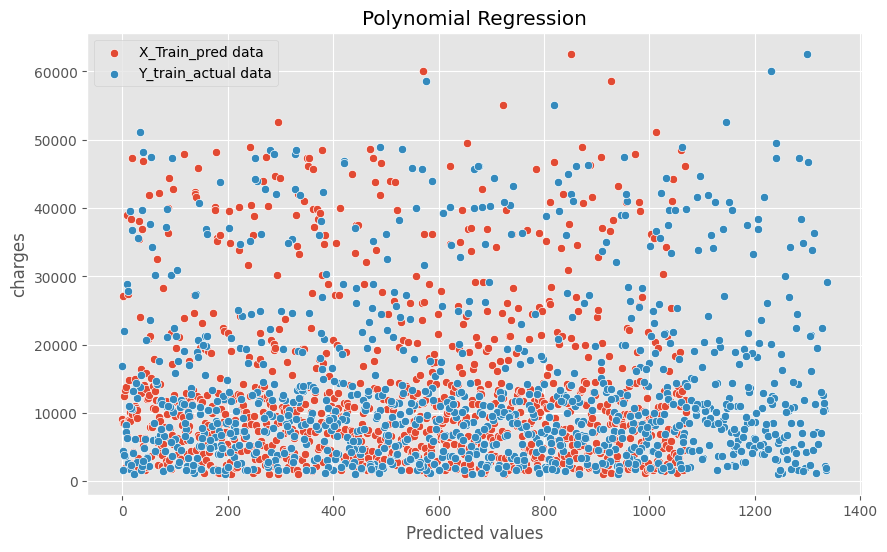

In [57]:
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
sns.scatterplot(x_train_pred_p ,label = 'X_Train_pred data')
sns.scatterplot(y_train, label = 'Y_train_actual data')
plt.title('Polynomial Regression')
plt.xlabel('Predicted values')
plt.legend()
plt.show()

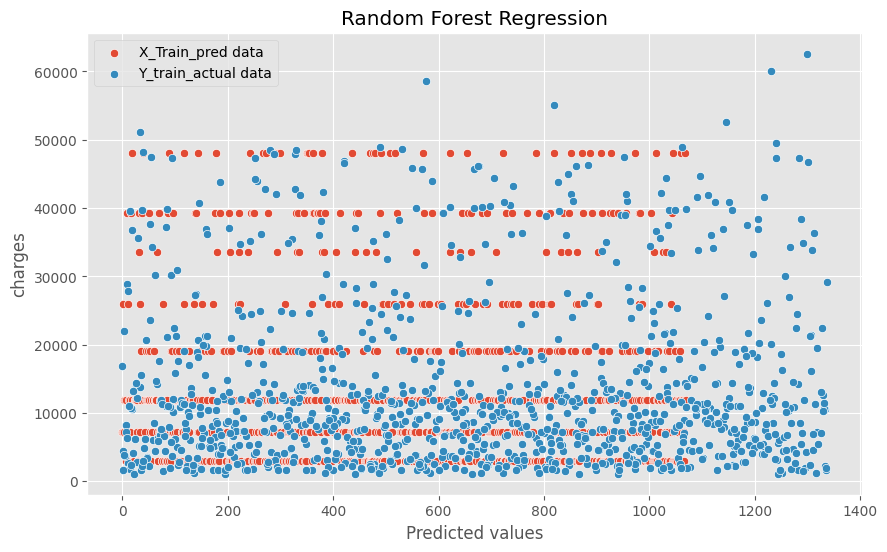

In [58]:
final_model = RandomForestRegressor().fit(x_train, y_train)
# Make predictions on the test set
x_test_pred_rf = model.predict(x_test)
x_train_pred_rf = model.predict(x_train)

plt.figure(figsize=(10,6))
plt.style.use('ggplot')
sns.scatterplot(x_train_pred_rf ,label = 'X_Train_pred data')
sns.scatterplot(y_train, label = 'Y_train_actual data')
plt.title('Random Forest Regression')
plt.xlabel('Predicted values')
plt.legend()
plt.show()
